In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
pathData = r"C:\data\udacity\airbnb_global\airbnb-listings.csv"

data = pd.read_csv(pathData, sep=";")

# drop raw from data where Country is 0 (corrupt dataset)
print(len(data))
data = data[data['Country'] != '0']
print(len(data))
data['Host Location'] = data['Host Location'].str.lower()
data['Country'] = data['Country'].str.lower()

C:\Users\sce2rng\AppData\Local\Temp\ipykernel_14744\4224078505.py:3: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(pathData, sep=";")


494954
494953


In [43]:
selData = data[['Price', 'Minimum Nights', 'Country', 'Latitude', 'Longitude', 'Review Scores Rating', 'Number of Reviews', 'Transit', 'Host Location', 'Property Type', 'Room Type', 'Guests Included']]
labels = selData['Price']

In [44]:
countryCodeDict = {"cx":"christmas island", "nl":"netherlands", "us": "united states", "es": "spain", "fr": "france", "it": "italy", 
                   "gb": "united kingdom", "de": "germany", "au": "australia", "ca": "canada", "pt": "portugal", 
                   "gr": "greece", "be": "belgium", "at": "austria", "ch": "switzerland", "dk": "denmark", "se": "sweden", 
                   "no": "norway", "fi": "finland", "ie": "ireland", "nz": "new zealand", "lu": "luxembourg", "sg": "singapore", 
                   "hk": "hong kong", "jp": "japan", "kr": "south korea", "tw": "taiwan", "cn": "china", "br": "brazil", "mx": "mexico", 
                   "ar": "argentina", "cl": "chile", "co": "colombia", "pe": "peru", "za": "south africa",
                   'ua': 'ukraine', 'sk': 'slovakia', 'wa': 'western sahara', 'dj': 'djibouti', 'by': 'belarus', 
                    'is': 'iceland', 'zm': 'zambia', 'mq': 'martinique', 'bl': 'saint barthélemy', 'la': 'laos', 
                    'ec': 'ecuador', 'jo': 'jordan', 'nc': 'new caledonia', 'mt': 'malta', 'eg': 'egypt', 
                    'ro': 'romania', 'rw': 'rwanda', 'de': 'germany', 'ke': 'kenya', '伦敦': 'united kingdom', 
                    'mg': 'madagascar', 'ae': 'united arab emirates', '加州': "united states", 'hn': 'honduras', 
                    'cz': 'czech republic', 'md': 'moldova', 'nl': 'netherlands', 'do': 'dominican republic', 
                    'si': 'slovenia', 'ma': 'morocco', 'dk': 'denmark', 'cm': 'cameroon', 'xk': 'kosovo', 
                    'bg': 'bulgaria', 'pr': 'puerto rico', 've': 'venezuela', 'sp': 'spain', 'th': 'thailand', 
                    'cr': 'costa rica', 'uk': 'united kingdom', 'lb': 'lebanon', 'ru': 'russia', 'vn': 'vietnam', 
                    'pa': 'panama', 'rd': 'dominican republic', 'fr': 'france', 'rs': 'serbia', 'bt': 'bhutan', 
                    'ge': 'georgia', 'al': 'albania', 'in': 'india', 'lt': 'lithuania', 'ee': 'estonia', 
                    'tt': 'trinidad and tobago', 'ng': 'nigeria', 'eu': 'european union', 'am': 'armenia', 
                    'it': 'italy', 'gh': 'ghana', 'hu': 'hungary', 'cw': 'curaçao', 'gr': 'greece', 'dm': 'dominica', 
                    'tn': 'tunisia', 'uk': 'united kingdom', 'id': 'indonesia', 'tr': 'turkey', 
                    'vc': 'saint vincent and the grenadines', 'ph': 'philippines', 'bd': 'bangladesh', 'rm': 'rome', 
                    'ht': 'haiti', 'qa': 'qatar', 'pl': 'poland', 'bc': 'british columbia', '中国': 'china', 
                    'it': 'italy', 'gt': 'guatemala', 'dz': 'algeria', 'cy': 'cyprus', 'vg': 'united kingdom', 
                    'gp': 'guadeloupe', 'bj': 'benin', 'pf': 'french polynesia', 'la': 'laos', 'uy': 'uruguay', 
                    'je': 'jersey', 'sa': 'saudi arabia', 'hr': 'croatia', 'il': 'israel', 'im': 'isle of man', 
                    're': 'réunion', 'lk': 'sri lanka', 'lv': 'latvia', 'mc': 'monaco', 'bh': 'bahrain', 'jm': 'jamaica', 
                    'es': 'spain', 'aw': 'aruba', 'my': 'malaysia', 'uk': 'united kingdom', 
                    'vi': "united states", 'dc': "united states", 'tx': "united states", 'nj': "united states", 'ny': "united states",'as': "united states", 
                    'eu': 'european union', '香港': 'hong kong'}

otherCountrys = {"sydney": "australia", "scotland": 'united kingdom', "england": 'united kingdom', "london": 'united kingdom', 
                "u.k.": "united kingdom", "u.s.": "united states", "uk":'united kingdom', "us": "united states", "canadá": "canada", 
                "mallorca": "spain", "españa": "spain", "roma": "italy", "italia": "italy", "paris": "france", "ny": "united states",
                "new york": "united states", "copenhagen": "denmark", "berlin": "germany", "mexico city": "mexico",
                "québec": "canada","quebec": "canada", "danmark": "denmark", "nederland": "netherlands", "nederlanden": "netherlands",
                "hongkong": "hong kong", "california": "united states", "texas": "united states", "florida": "united states",
                "香港中环堅尼地dao": "hong kong", "wales": "united kingdom", "venice beach": "united states", "venice": "italy",
                "dublin": "irland", "buenos aires": "argentina", "barcelona": "spain", "madrid": "spain", "lisbon": "portugal", 
                "londra": "united kingdom", "queensland": "australia", "victoria": "australia", "melbourne": "australia",
                "tel aviv": "israel", "espana": "spain", "korea": "south korea", "calviá": "spain", "ontario": "canada", 
                "中國香港": "hong kong", "brooklyn": "united states", "macau": "china", "shoreditch": 'united kingdom', "istanbul": "turkey","londres": "united kingdom",
                "københavn": "denmark", "deutschland": "germany", "frankreich": "france", "österreich": "austria", "oesterreich": "austria", "schweiz": "switzerland"}

restCountrys = ['samoa', 'montenegro','pakistan',"brasil", 'paraguay',"uzbekistan", "cuba", "fiji", "ethiopia", "south korea", "grece", "iraq", "yemen", "bahamas", "azerbaijan", "israel", "vanuatu", "vatican city", "luxemburg", "libya", "senegal", "brunei", "laos"]
chatGpdCountrys = [
 'afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia',
 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin',
 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso', 'burundi',
 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia',
 'comoros', 'congo (democratic republic)', 'congo (republic)', 'costa rica', 'croatia', 'cuba', 'cyprus', 'czechia',
 'denmark', 'djibouti', 'dominica', 'dominican republic', 'east timor', 'ecuador', 'egypt', 'el salvador',
 'equatorial guinea', 'eritrea', 'estonia', 'eswatini', 'ethiopia', 'fiji', 'finland', 'france', 'gabon', 'gambia',
 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti',
 'honduras', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland', 'israel', 'italy', 'jamaica',
 'japan', 'jordan', 'kazakhstan', 'kenya', 'kiribati', 'north korea', 'south korea', 'kosovo', 'kuwait',
 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania',
 'luxembourg', 'madagascar', 'malawi', 'malaysia', 'maldives', 'mali', 'malta', 'marshall islands', 'mauritania',
 'mauritius', 'mexico', 'micronesia', 'moldova', 'monaco', 'mongolia', 'montenegro', 'morocco', 'mozambique',
 'myanmar', 'namibia', 'nauru', 'nepal', 'netherlands', 'new zealand', 'nicaragua', 'niger', 'nigeria', 'north macedonia',
 'norway', 'oman', 'pakistan', 'palau', 'panama', 'papua new guinea', 'paraguay', 'peru', 'philippines', 'poland',
 'portugal', 'qatar', 'romania', 'russia', 'rwanda', 'saint kitts and nevis', 'saint lucia', 'saint vincent and the grenadines',
 'samoa', 'san marino', 'sao tome and principe', 'saudi arabia', 'senegal', 'serbia', 'seychelles', 'sierra leone',
 'singapore', 'slovakia', 'slovenia', 'solomon islands', 'somalia', 'south africa', 'south sudan', 'spain', 'sri lanka',
 'sudan', 'suriname', 'sweden', 'switzerland', 'syria', 'taiwan', 'tajikistan', 'tanzania', 'thailand', 'togo', 'tonga',
 'trinidad and tobago', 'tunisia', 'turkey', 'turkmenistan', 'tuvalu', 'uganda', 'ukraine', 'united arab emirates',
 'united kingdom', 'united states', 'uruguay', 'uzbekistan', 'vanuatu', 'vatican city', 'venezuela', 'vietnam',
 'yemen', 'zambia', 'zimbabwe'
]
restCountrys = list(set(restCountrys + chatGpdCountrys + list(data['Country'])))


In [45]:
# replace host location with country code if it is in the dictionary
for key in countryCodeDict.keys():
    selData['Host Location'] = selData['Host Location'].replace(key, countryCodeDict[key])

# when one of the Values of the countryCodeDict is part of the Host Location, replace it with that value
for value in list(countryCodeDict.values()) + restCountrys:
    selData['Host Location'] = selData['Host Location'].replace({f'.*{value}.*': value}, regex=True)

# replace other parts
for key in otherCountrys.keys():
    selData['Host Location'] = selData['Host Location'].replace({f'.*{key}.*': otherCountrys[key]}, regex=True)

# replace Host location with 2 "," with the part after the last ","
selData['Host Location'] = selData['Host Location'].apply(lambda x: str(x).split(',')[-1] if str(x).count(',') == 2 else x)


print(selData['Host Location'].value_counts())

C:\Users\sce2rng\AppData\Local\Temp\ipykernel_14744\195984509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selData['Host Location'] = selData['Host Location'].replace(key, countryCodeDict[key])
C:\Users\sce2rng\AppData\Local\Temp\ipykernel_14744\195984509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selData['Host Location'] = selData['Host Location'].replace({f'.*{value}.*': value}, regex=True)
C:\Users\sce2rng\AppData\Local\Temp\ipykernel_14744\195984509.py:11: SettingWithCopyWarning: 
A valu

united states                                                                                                       203426
united kingdom                                                                                                       59869
france                                                                                                               55449
spain                                                                                                                42926
italy                                                                                                                32598
canada                                                                                                               30564
denmark                                                                                                              19942
netherlands                                                                                                          15077
belgium         

C:\Users\sce2rng\AppData\Local\Temp\ipykernel_14744\195984509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selData['Host Location'] = selData['Host Location'].apply(lambda x: str(x).split(',')[-1] if str(x).count(',') == 2 else x)


In [46]:
foundCountrys = list(set(list(countryCodeDict.values()) + list(otherCountrys.values()) + restCountrys))

# replace not found countrys with nan
selData['Host Location'] = selData['Host Location'].apply(lambda x: np.nan if x not in foundCountrys else x)




C:\Users\sce2rng\AppData\Local\Temp\ipykernel_14744\2973947156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selData['Host Location'] = selData['Host Location'].apply(lambda x: np.nan if x not in foundCountrys else x)


In [47]:
# show how many time the Country and Host location are the same ignore nan values
noNanData = selData.dropna(subset=['Country'])
noNanData = noNanData.dropna(subset=['Host Location'])
print(f"Property Location = Host Location: {len(noNanData[noNanData['Country'] == noNanData['Host Location']])}")


Property Location = Host Location: 405208


In [ ]:
# Assuming that df is your DataFrame and it has columns 'Country' and 'Host Location'
countryNotHost = noNanData.loc[noNanData['Country'] != noNanData['Host Location']]
countryEqualHost = noNanData.loc[noNanData['Country'] == noNanData['Host Location']]

# Percentage of the rows where the country and host location are not the same per Country
countryNotHost = countryNotHost.groupby('Country').size().reset_index(name='count_countryNotHost')
countryEqualHost = countryEqualHost.groupby('Country').size().reset_index(name='count_countryEqualHost')

# Merge the two dataframes on 'Country'
merged = pd.merge(countryEqualHost, countryNotHost, on='Country', how='outer')

# Fill NaN values with 0
merged.fillna(0, inplace=True)

# add Total number of counts
merged['Number of Properties'] = merged['count_countryEqualHost'] + merged['count_countryNotHost']
# Calculate the percentage
merged['percentage'] = merged['count_countryNotHost'] / (merged['count_countryEqualHost'] + merged['count_countryNotHost']) * 100

# Sort by percentage
merged = merged.sort_values(by='percentage', ascending=False)

# Set 'Country' as index
merged.set_index('Country', inplace=True)

# Add line for the total counts
merged.loc['Total'] = merged.sum()
merged.at['Total', 'percentage'] = merged.at['Total', 'count_countryNotHost'] / (merged.at['Total', 'count_countryEqualHost'] + merged.at['Total', 'count_countryNotHost']) * 100

# Set pandas display options
display(merged)

# Control: total number of counts should be the same as the total number of rows
print("")
print(len(noNanData))
print(merged.at['Total', 'count_countryEqualHost'] + merged.at['Total', 'count_countryNotHost'])

,count_countryEqualHost,count_countryNotHost,Number of Properties,percentage
Country,,,,
vatican city,0.0,2.0,2.0,100.000000
vanuatu,0.0,1.0,1.0,100.000000
uruguay,0.0,1.0,1.0,100.000000
austria,4.0,7839.0,7843.0,99.948999
germany,13.0,20400.0,20413.0,99.936315
australia,41.0,40418.0,40459.0,99.898663
china,42.0,7.0,49.0,14.285714
hong kong,5547.0,769.0,6316.0,12.175427
greece,4519.0,540.0,5059.0,10.674046



491411
491411.0


In [ ]:
# get Host Location per Country with the highest count
countCountry = noNanData.groupby('Country').first()
countCountry = countCountry.reset_index()
countCountry = countCountry.sort_values('Count', ascending=False)
countCountry = countCountry.set_index('Country')
print(countCountry)

In [ ]:
# Assuming that df is your DataFrame and it has columns 'Country' and 'Host Location'
hostNotCountry = noNanData.loc[noNanData['Host Location'] != noNanData['Country']]
hostEqualCountry = noNanData.loc[noNanData['Host Location'] == noNanData['Country']]

# Percentage of the rows where the host location and country are not the same per Host Location
hostNotCountry = hostNotCountry.groupby('Host Location').size().reset_index(name='count_hostNotCountry')
hostEqualCountry = hostEqualCountry.groupby('Host Location').size().reset_index(name='count_hostEqualCountry')

# Merge the two dataframes on 'Host Location'
merged = pd.merge(hostEqualCountry, hostNotCountry, on='Host Location', how='outer')

# Fill NaN values with 0
merged.fillna(0, inplace=True)

# Add Total number of counts
merged['Number of Properties'] = merged['count_hostEqualCountry'] + merged['count_hostNotCountry']

# Calculate the percentage
merged['percentage'] = merged['count_hostNotCountry'] / (merged['count_hostEqualCountry'] + merged['count_hostNotCountry']) * 100

# Sort by percentage
merged = merged.sort_values(by='percentage', ascending=False)

# Set 'Host Location' as index
merged.set_index('Host Location', inplace=True)

# Add line for the total counts
merged.loc['Total'] = merged.sum()
merged.at['Total', 'percentage'] = merged.at['Total', 'count_hostNotCountry'] / (merged.at['Total', 'count_hostEqualCountry'] + merged.at['Total', 'count_hostNotCountry']) * 100

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10)
display(merged)

# Control: total number of counts should be the same as the total number of rows
print("")
print(len(noNanData))
print(merged.at['Total', 'count_hostEqualCountry'] + merged.at['Total', 'count_hostNotCountry'])

                                  count_hostEqualCountry  \
Host Location                                              
jamaica                                              0.0   
poland                                               0.0   
mongolia                                             0.0   
montenegro                                           0.0   
morocco                                              0.0   
mozambique                                           0.0   
myanmar                                              0.0   
namibia                                              0.0   
nepal                                                0.0   
new caledonia                                        0.0   
new zealand                                          0.0   
nicaragua                                            0.0   
niger                                                0.0   
norway                                               0.0   
oman                                    

In [ ]:
# get Country per Host Location with the highest count
countHost = countCountry.groupby('Host Location').first()
countHost = countHost.reset_index()
countHost = countHost.sort_values('Count', ascending=False)
countHost = countHost.set_index('Host Location')
print(countHost)


                       Country  Count
Host Location                        
united states        australia  39262
united kingdom           spain    585
france          united kingdom    427
canada           united states    380
italy                   france    284
...                        ...    ...
chad            united kingdom      1
cameroon                france      1
mozambique             denmark      1
brunei               australia      1
libya                  ireland      1

[162 rows x 2 columns]


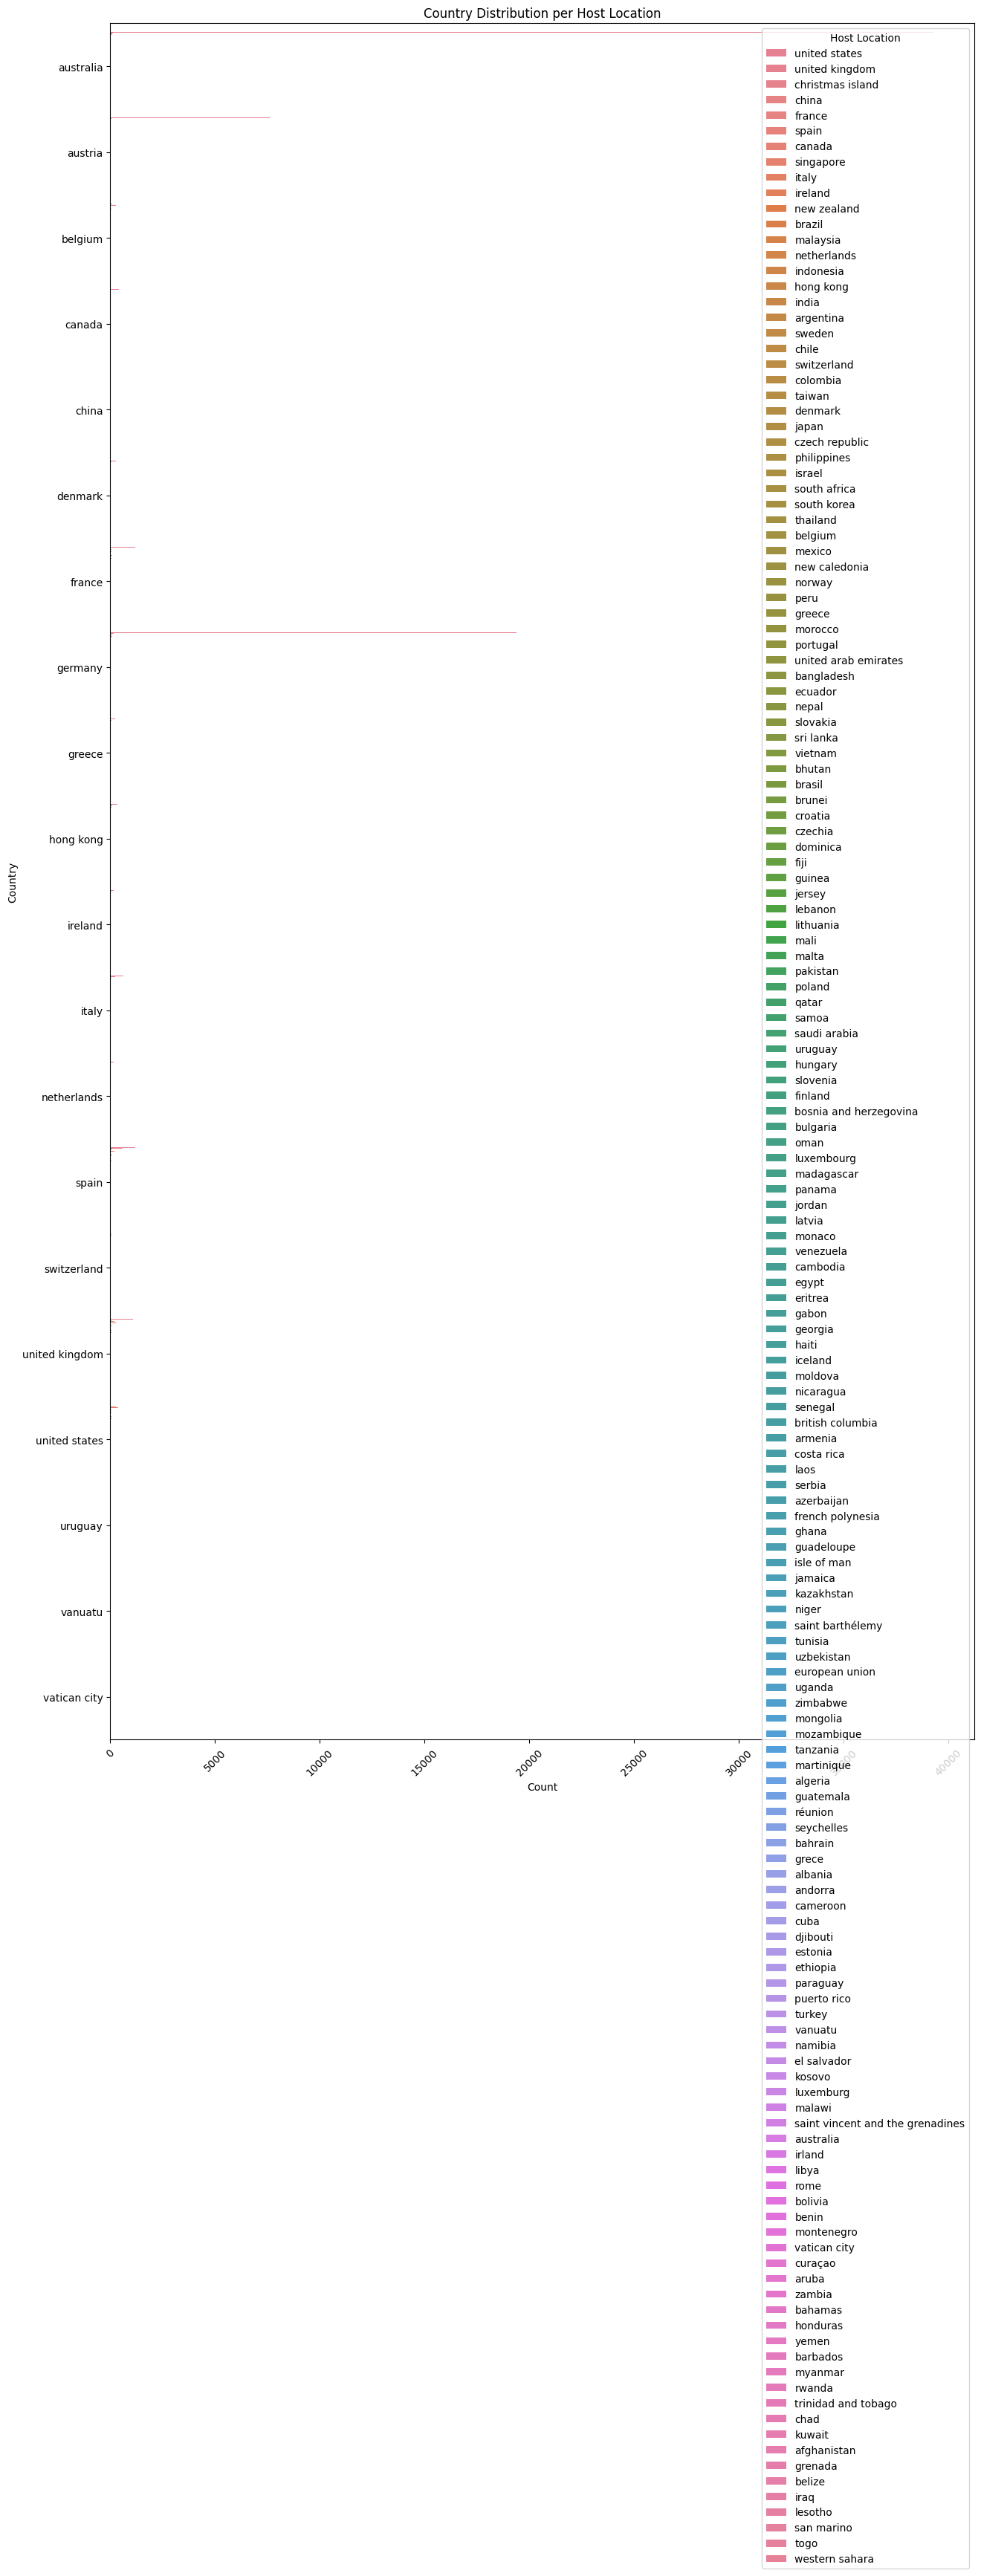

In [ ]:
# Prepare the data
countHost = countryNotHost.groupby('Country')['Host Location'].value_counts().reset_index(name='Count')

# Plot
plt.figure(figsize=(15, 30))
sns.barplot(y='Country', x='Count', hue='Host Location', data=countHost, orient='h')
plt.xticks(rotation=45)
plt.ylabel('Country')
plt.xlabel('Count')
plt.title('Country Distribution per Host Location')
#plt.xlim(0, 2500)
plt.show()

In [ ]:
# get Host location per country with the highest count
countHost = countryNotHost.groupby('Country')['Host Location'].value_counts().reset_index(name='Count')
countHost = countHost.groupby('Country').first()
countHost = countHost.reset_index()
countHost = countHost.sort_values('Count', ascending=False)
countHost = countHost.set_index('Country')
print(countHost)


                Host Location  Count
Country                             
australia       united states  39262
germany         united states  19386
austria         united states   7593
france          united states   1192
spain           united states   1178
united kingdom  united states   1099
italy           united states    625
canada          united states    399
united states          canada    380
hong kong       united states    341
belgium                france    267
denmark         united states    260
greece          united states    239
netherlands     united states    176
ireland         united states    148
switzerland            france     65
china               hong kong      6
vatican city            italy      2
uruguay         united states      1
vanuatu               ireland      1


In [ ]:
# get number of different Host Locations per Country
countHost = countryNotHost.groupby('Country')['Host Location'].nunique()
countHost = countHost.sort_values(ascending=False)
print(data_counts)

Country
united states     100
united kingdom     97
france             95
spain              80
germany            72
australia          65
canada             64
italy              62
denmark            51
ireland            50
belgium            50
netherlands        49
austria            40
hong kong          38
greece             35
switzerland        26
china               2
uruguay             1
vanuatu             1
vatican city        1
Name: Host Location, dtype: int64
